# Chicago Area Plot Refinement Region (Black Box 3km outside 25km)
This notebook visualizes the region to be refined, as estimated from the provided image.

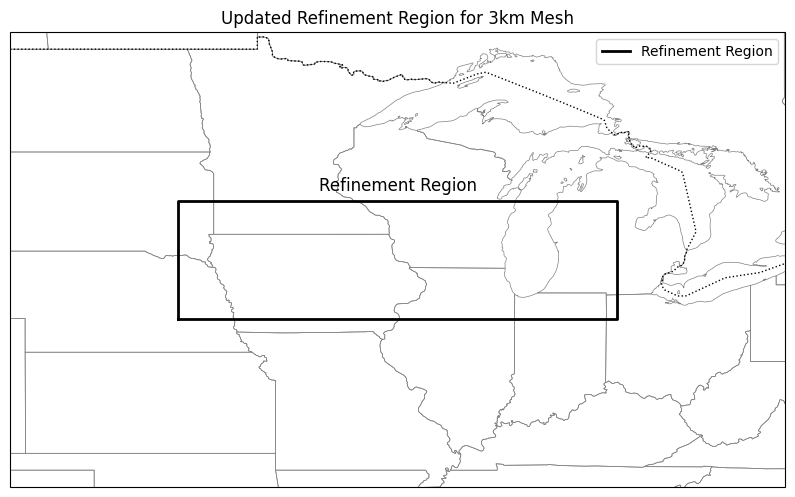

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Updated bounds (better match to image)
lon_min, lon_max = -97.5, -84.5
lat_min, lat_max = 41, 44.5

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min-5, lon_max+5, lat_min-5, lat_max+5], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.STATES, edgecolor='gray', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.coastlines(resolution='10m')

# Draw the black box
rect_lons = [lon_min, lon_max, lon_max, lon_min, lon_min]
rect_lats = [lat_min, lat_min, lat_max, lat_max, lat_min]
ax.plot(rect_lons, rect_lats, color='black', linewidth=2, transform=ccrs.PlateCarree(), label='Refinement Region')

# Annotate
ax.text((lon_min+lon_max)/2, lat_max+0.3, 'Refinement Region', color='black', ha='center', fontsize=12, transform=ccrs.PlateCarree())

plt.title('Updated Refinement Region for 3km Mesh')
plt.legend()
plt.show()

### SQuadGen Mesh Refinement Command

```bash
SQuadGen --grid_type CS --resolution 120 --refine_level 3 --refine_type LOWCONN --refine_rect "-97.5,41,-84.5,44.5,3" --output chicago_refine_ne120_3km.nc

### Parameter Explanation

- **--grid_type CS**  
  Sets the grid type to Cubed Sphere (CS), dividing the globe into 6 panels.

- **--resolution 120**  
  Sets the base mesh resolution to 120 cells per panel edge (ne120), which corresponds to a global mesh spacing of approximately 25 km.

- **--refine_level 3**  
  Applies 3 levels of refinement within the specified region.  
  - Each level halves the cell size.  
  - 3 levels: 25 km / 2³ ≈ 3.1 km inside the refined box.

- **--refine_type LOWCONN**  
  Specifies the refinement method. `LOWCONN` is a standard local refinement scheme.

- **--refine_rect "-97.5,41,-84.5,44.5,3"**  
  Defines the rectangular region to refine and the refinement level within that region.  
  - **Order:** `lon_min, lat_min, lon_max, lat_max, refine_level`  
  - Here:  
    - Longitude: -97.5° to -84.5°  
    - Latitude: 41° to 44.5°  
    - Refinement level: 3  
  - **Important:**  
    - The rectangle must be fully inside a single cubed sphere panel.  
    - If the box crosses a panel boundary, SQuadGen will fail.  
    - The order of values is critical: always use `lon_min, lat_min, lon_max, lat_max, refine_level`.

- **--output chicago_refine_ne120_3km.nc**  
  Specifies the output filename.

---

### Mesh Resolution Summary

- **Outside the box:**  
  - ne120 (~25 km) resolution.
- **Inside the box:**  
  - 3 levels of refinement → ~3 km resolution.

---

### Key Takeaways

- The `--refine_rect` region must not cross cubed sphere panel boundaries.
- The refinement level determines the increase in resolution within the box.
- Use a sufficiently high base resolution and refinement level for high-resolution regional meshes.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Path   [Longitude,Latitude]
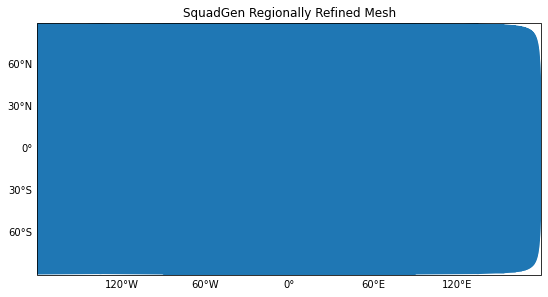

In [8]:
import uxarray as ux

# Load mesh
mesh = ux.open_dataset('chicago_refine_ne120_3km.nc', 'chicago_refine_ne120_3km.nc')

# Plot mesh
mesh.uxgrid.plot(title='SquadGen Regionally Refined Mesh', backend='matplotlib', height=500, width=750)

:Path   [Longitude,Latitude]
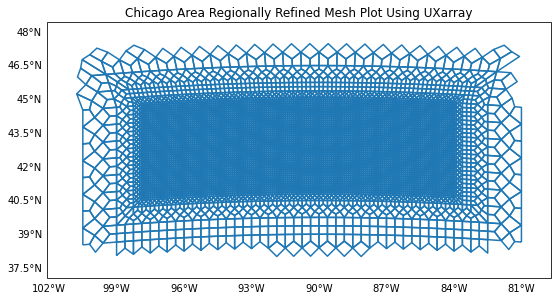

In [13]:
import uxarray as ux
import cartopy.crs as ccrs

# Load your mesh
mesh = ux.open_grid("chicago_refine_ne120_3km.nc")

# Define the expanded bounding box
lon_bounds = (-101, -81)
lat_bounds = (38, 47.5)

# Subset the mesh
mesh_subset = mesh.subset.bounding_box(lon_bounds=lon_bounds, lat_bounds=lat_bounds)

# Plot the subset
mesh_subset.plot(
    title='Chicago Area Regionally Refined Mesh Plot Using UXarray',
    backend='matplotlib', height=500, width=750, 
)